# clustering (Moscow Districts)

In [1]:
from matplotlib import pyplot as plt
%matplotlib inline

%config InlineBackend.figure_format = 'retina'
from pylab import rcParams
rcParams['figure.figsize'] = (9, 6)

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns
sns.set()

In [2]:
df = pd.read_excel('geo_comment.xlsx',index_col='Unnamed: 0')
df.drop('comment',axis=1,inplace=True)

In [3]:
df.head()

,x,y,comment_class,multiplier
0,37.612416,55.777454,-1,1
1,37.612416,55.777454,-1,1
2,37.603298,55.742108,-1,1
3,37.558526,55.728758,-1,1
4,37.566431,55.731794,-1,1


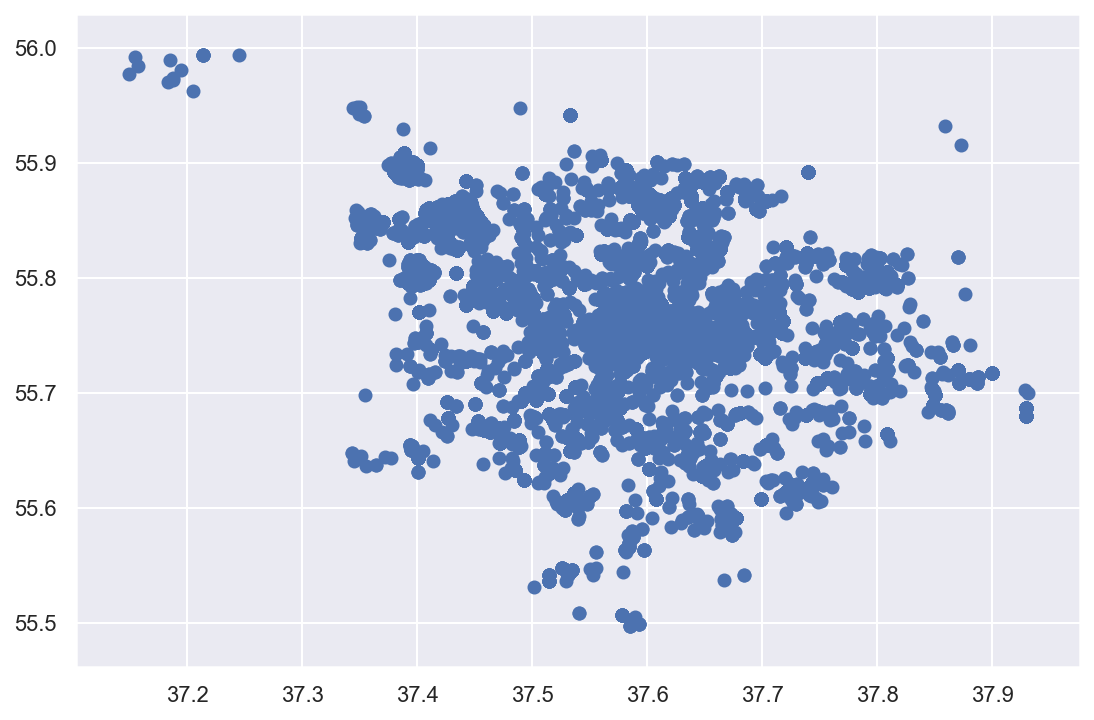

In [4]:
plt.scatter(df.x,df.y)

In [5]:
# img = plt.imread("msk.png")
# plt.imshow(img,zorder=0, extent=[df.x.min(),df.x.max(),df.y.min(),df.y.max()])
# plt.scatter(df.x,df.y)
# plt.show()

# Finding best number of clusters

In [6]:
X = df[['x','y']]

In [7]:
scaler = StandardScaler().fit(X)
X = scaler.transform(X) 

In [8]:
k_inertia = []
ks = range(1,16)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k,random_state=42)
    clusters_kmeans = clf_kmeans.fit_predict(X, )
    k_inertia.append(clf_kmeans.inertia_)

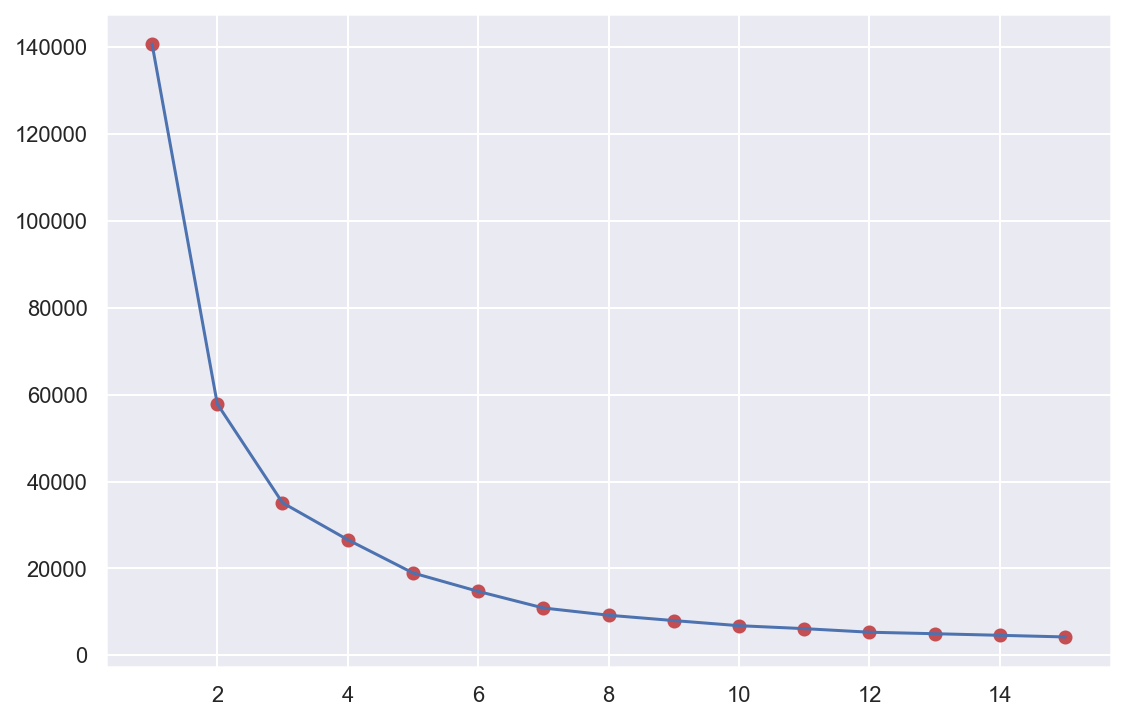

In [9]:
plt.plot(ks, k_inertia, 'ro')
plt.plot(ks, k_inertia);

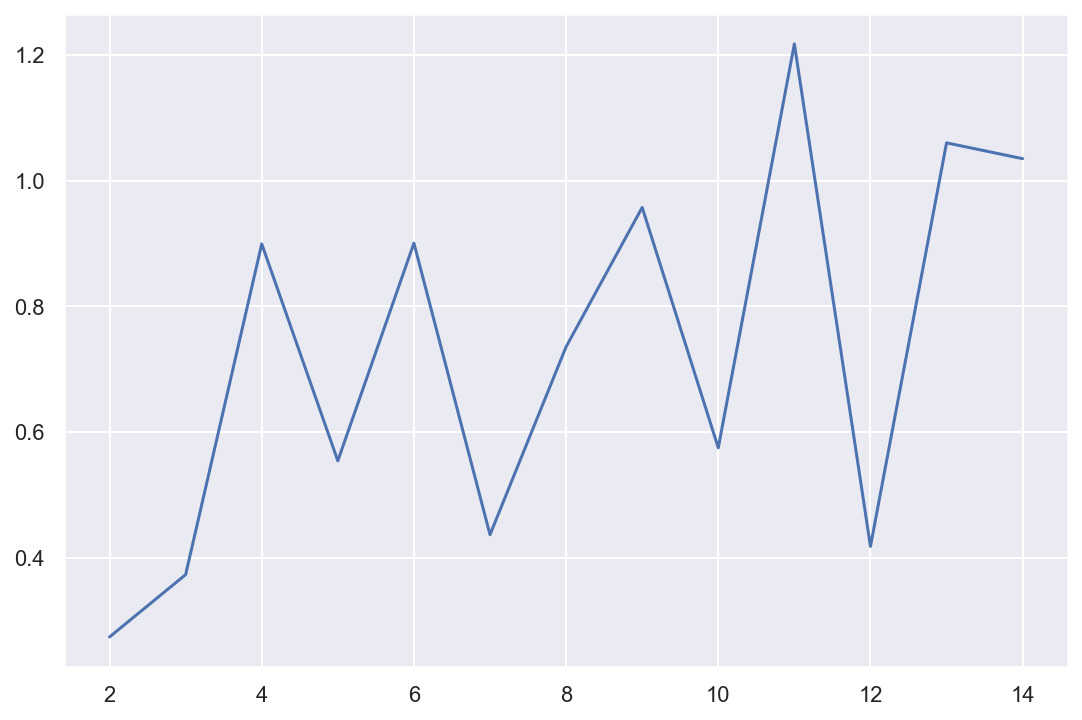

In [10]:
diff = np.diff(k_inertia)
diff_r = diff[1:] / diff[:-1]
plt.plot(ks[1:-1], diff_r);

In [11]:
# 4 best
print(diff_r.argsort()[0:4]+2)

[ 2  3 12  7]


let's choose 12

# District Visualization 

In [12]:
km_clf = KMeans(n_clusters=12,random_state=42)
df['district'] = km_clf.fit_predict(X, )


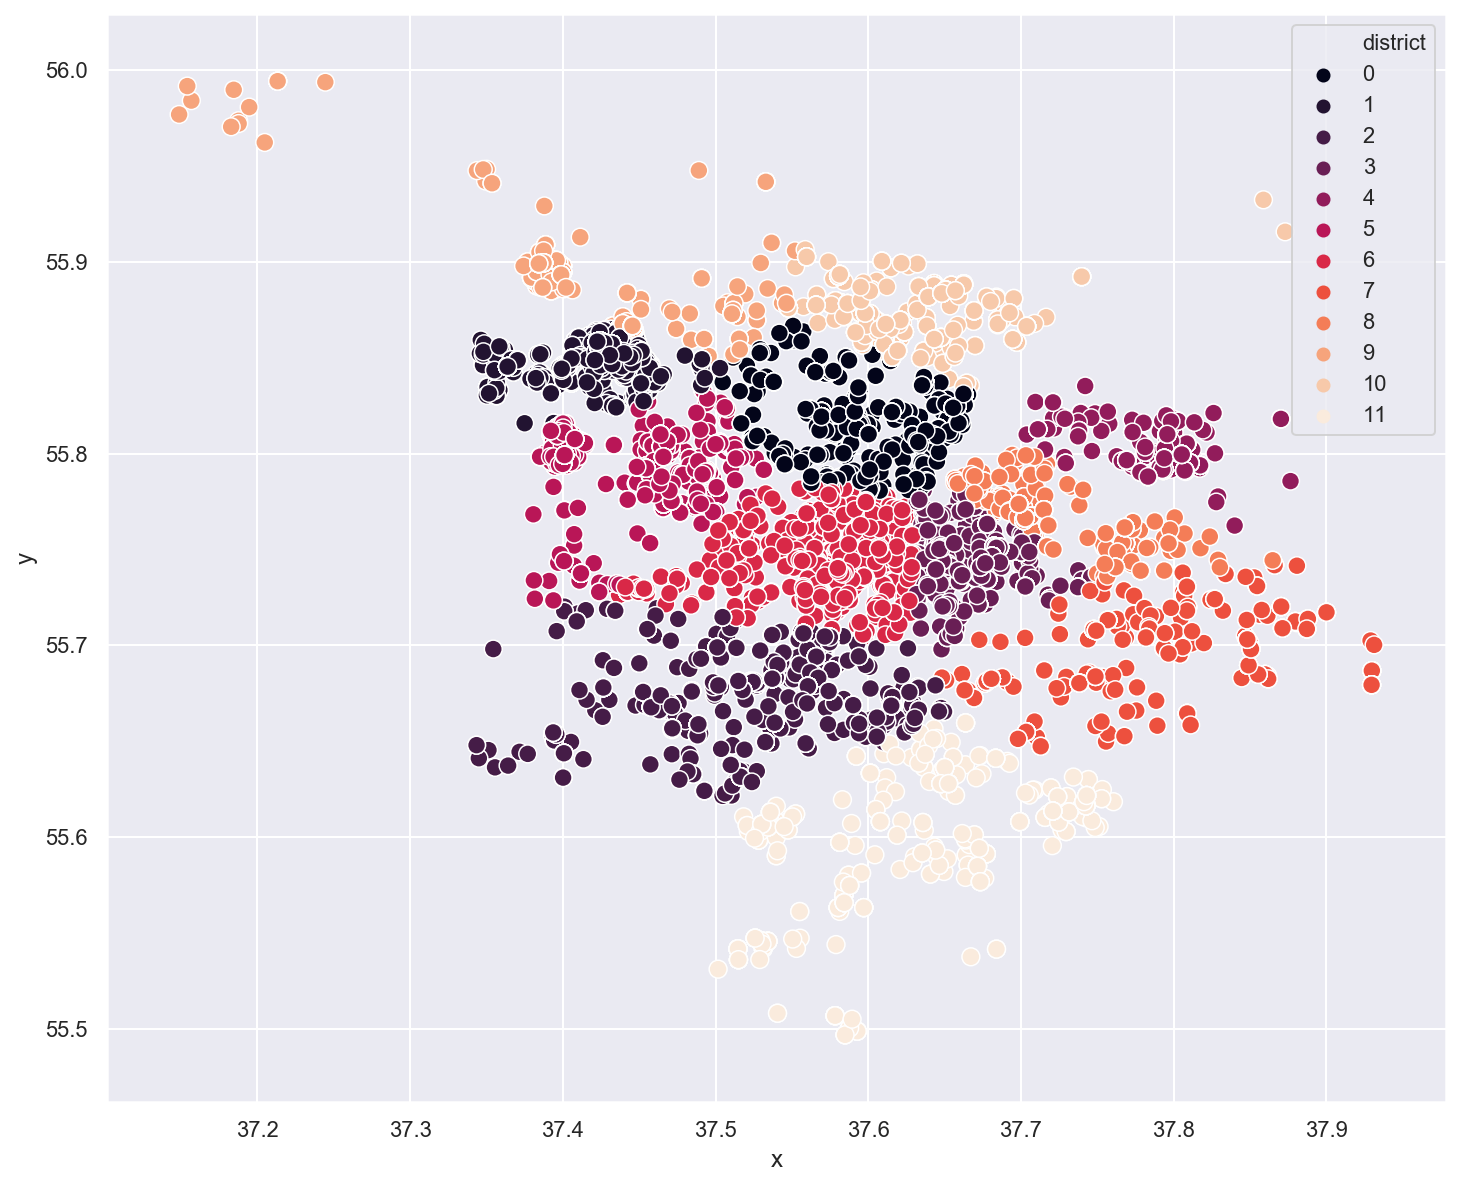

In [13]:
plt.figure(figsize=(12,10))
sns.scatterplot(data=df[['x','y','district']],x="x", y="y", hue="district", legend="full",palette="rocket",s=80)


# Voting Visualization

In [14]:
df.comment_class = df.comment_class.map({-1:"against",1:"for"})

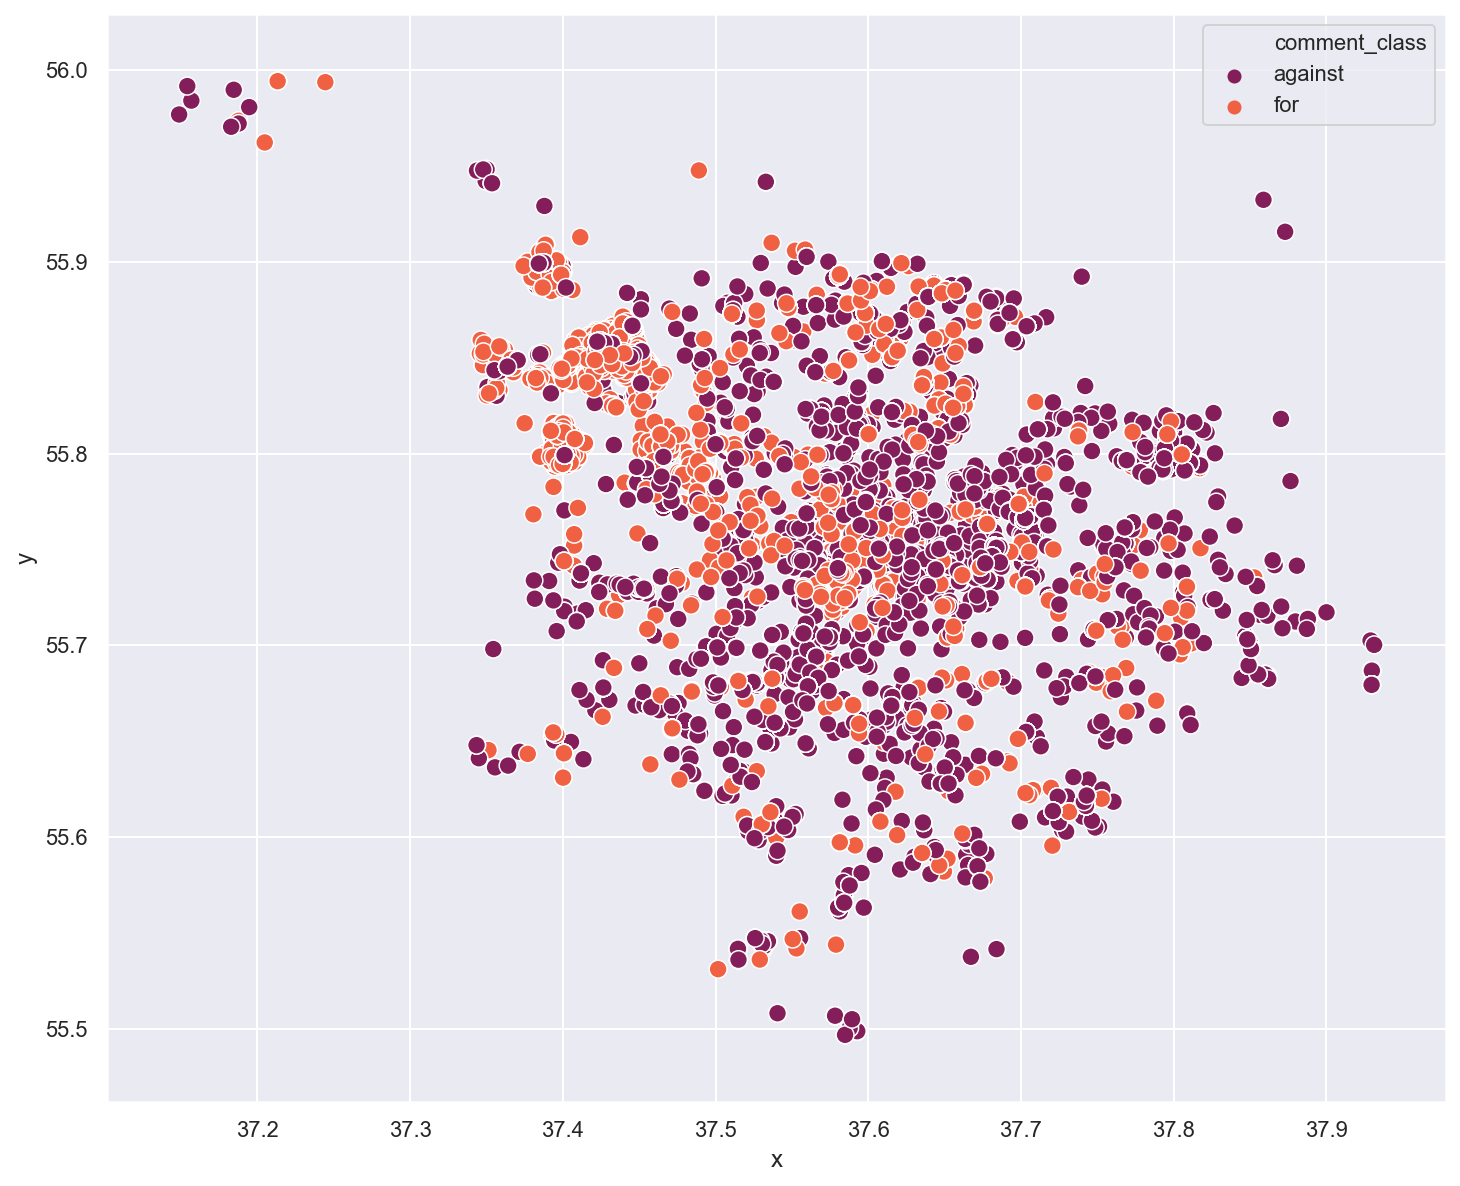

In [15]:
plt.figure(figsize=(12,10))
sns.scatterplot(data=df[['x','y','comment_class']],x="x", y="y", hue="comment_class", legend="full",palette="rocket",s=80)

# Voting results by district

In [16]:
# in some districts people voted in groups
df['count_of_votes']= np.abs(df.multiplier* df.comment_class.map({"against":-1,"for":1}))

In [17]:
voting_in_district = df.pivot_table('count_of_votes',index='district',columns='comment_class',aggfunc='sum')

In [18]:
voting_in_district

comment_class,against,for
district,,
0,4704,343
1,6779,1575
2,18205,150
3,11494,213
4,3926,3413
5,10376,1186
6,17638,4559
7,2611,88
8,6601,92


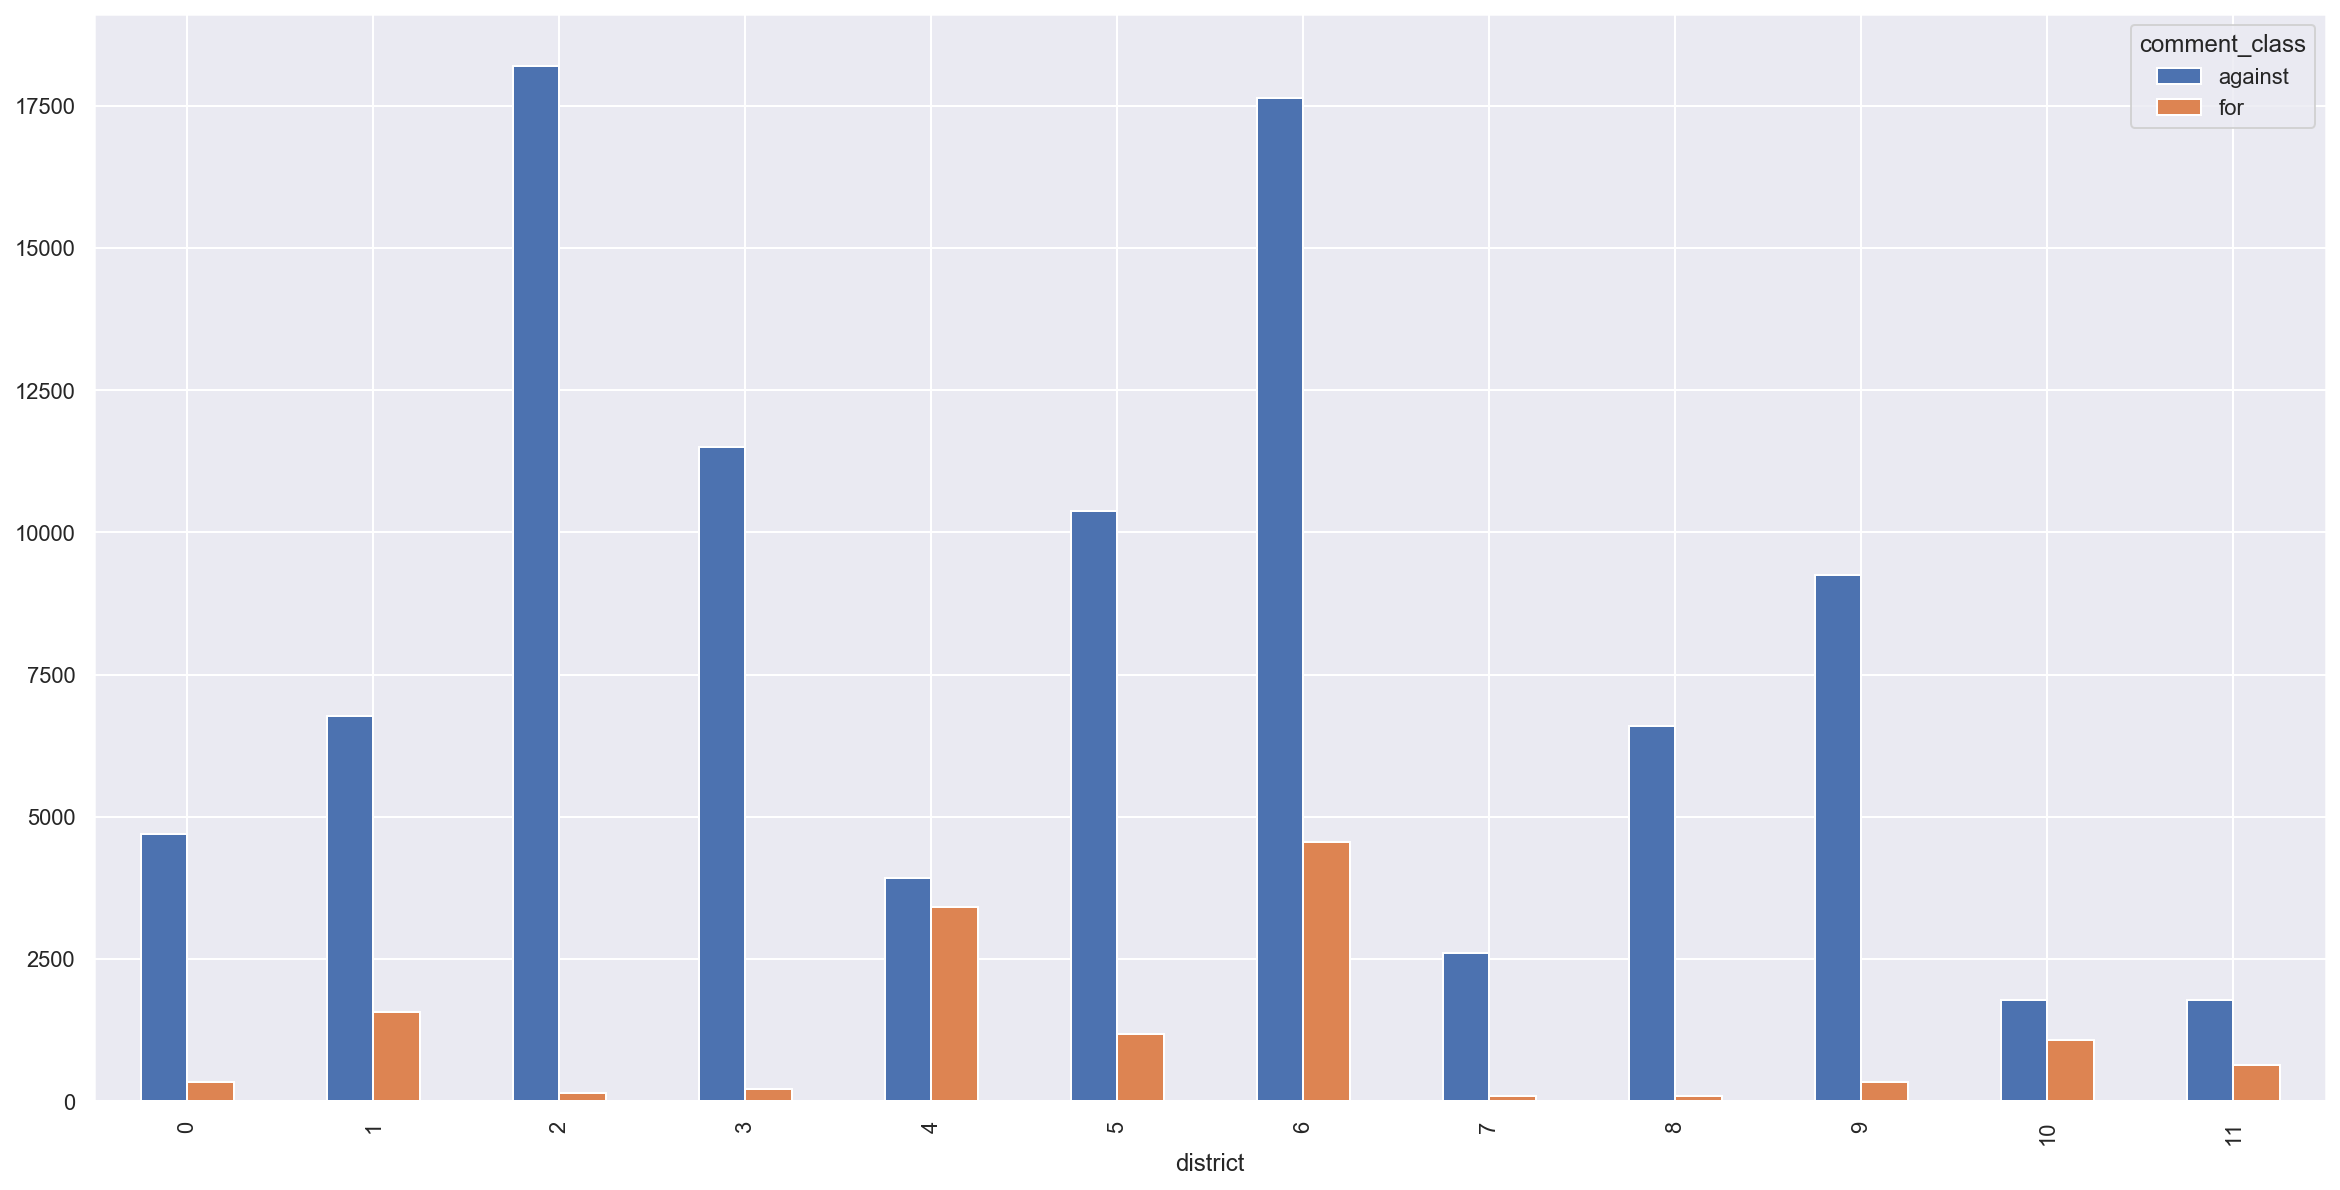

In [19]:
voting_in_district.plot(kind='bar',figsize=(20,10))